### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) 
%matplotlib inline 
import datetime


#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [77]:
#Read data from files
data = pd.read_csv("Data.csv")
item = pd.read_csv("item.csv")
user = pd.read_csv("user.csv")

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [78]:
#Know about the Nature of the dataset columns and datatypes
data.info()
#find the information of the files like how many records, data type of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [79]:
#Know about the Shape
data.shape
#Shape tells how many records and columns are present.

(100000, 4)

In [80]:
#Five point summary of the data
data.describe()
#Tells the five point summary of the data, first sight tells if there is any outlier.

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [81]:
#information about the item file
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
movie id        1681 non-null int64
movie title     1681 non-null object
release date    1681 non-null object
unknown         1681 non-null int64
Action          1681 non-null int64
Adventure       1681 non-null int64
Animation       1681 non-null int64
Childrens       1681 non-null int64
Comedy          1681 non-null int64
Crime           1681 non-null int64
Documentary     1681 non-null int64
Drama           1681 non-null int64
Fantasy         1681 non-null int64
Film-Noir       1681 non-null int64
Horror          1681 non-null int64
Musical         1681 non-null int64
Mystery         1681 non-null int64
Romance         1681 non-null int64
Sci-Fi          1681 non-null int64
Thriller        1681 non-null int64
War             1681 non-null int64
Western         1681 non-null int64
dtypes: int64(20), object(2)
memory usage: 289.0+ KB


In [82]:
item.describe()
#Not more insightful as the values of the data are more in 0 and 1

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
user.describe()
#Inference: #There is a gap b/w 50% age and 75 % age is bit more.

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [84]:
print(data.isnull().sum())
print ('\n')
print(item.isnull().sum())
print ('\n')
print(user.isnull().sum())
#Look at the null values in each file

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64


movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64


user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64


In [85]:
#item.info()
item.loc[:3,['movie id','movie title']]
#item.loc[0:1]

,movie id,movie title
0,1,Toy Story
1,2,GoldenEye
2,3,Four Rooms
3,4,Get Shorty


In [86]:
#this code is used to do group by of columns based on location
#These are pratice codes
#s = item.groupby('release date')[item.columns[3:8]].sum()
#s
item.columns

Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [88]:
#s = item.groupby('release date')[item.columns[3:8]].sum()
#s
#for i, rd_df in s:
 #   print(i)
  #  print(rd_df)

#### 4. Find the number of movies per genre using the item data - 5 marks

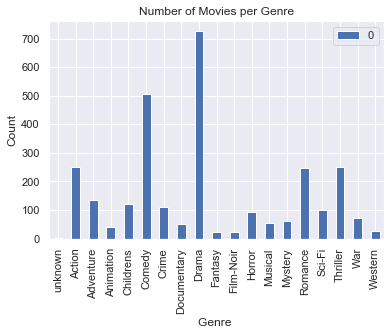

In [89]:
# use sum on the default axis
column_list = list(item)
rm_col = ('movie id','movie title','release date')
for i in rm_col:
    column_list.remove(i)
#column_list
y = pd.DataFrame(item[column_list].sum(axis = 0))

y.plot(kind='bar',color='b')
#sns.distplot(y)
plt.title('Number of Movies per Genre')
plt.ylabel('Count')
plt.xlabel('Genre ')
plt.show()

In [90]:
item_by_year =item.copy()
item_by_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
movie id        1681 non-null int64
movie title     1681 non-null object
release date    1681 non-null object
unknown         1681 non-null int64
Action          1681 non-null int64
Adventure       1681 non-null int64
Animation       1681 non-null int64
Childrens       1681 non-null int64
Comedy          1681 non-null int64
Crime           1681 non-null int64
Documentary     1681 non-null int64
Drama           1681 non-null int64
Fantasy         1681 non-null int64
Film-Noir       1681 non-null int64
Horror          1681 non-null int64
Musical         1681 non-null int64
Mystery         1681 non-null int64
Romance         1681 non-null int64
Sci-Fi          1681 non-null int64
Thriller        1681 non-null int64
War             1681 non-null int64
Western         1681 non-null int64
dtypes: int64(20), object(2)
memory usage: 289.0+ KB


In [91]:
item_by_year['release date']=pd.to_datetime(item_by_year['release date'], format = '%d-%m-%Y')
item_by_year['release year']=item_by_year['release date'].dt.year
print(item_by_year['release year'].unique())
#item.groupby('release year',as_index=False)['Action','War','Western'].sum()
#from datetime import datetime
#item['release date1'] = item['release date'].apply(lambda x : datetime.strptime(x, '%d-%b-%y'))
#item.info()
#item['release date1'].dt.year.unique()
item_by_year

[1995 1996 1994 1967 1977 1993 1965 1982 1990 1992 1991 1937 1997 1981
 1970 1972 1961 1939 1941 1968 1969 1954 1971 1988 1973 1979 1987 1986
 1989 1974 1980 1985 1966 1957 1960 1984 1983 1975 1998 1940 1950 1964
 1951 1962 1933 1956 1963 1958 1945 1976 1978 1959 1942 1953 1946 1955
 1938 1934 1949 1948 1943 1944 1936 1935 1930 1952 1931 2022 1947 1932
 2026]


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,Toy Story,1995-01-01,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,1995-01-01,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,1995-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,1995-01-01,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,1995-01-01,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,1998-02-06,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998
1677,1679,B. Monkey,1998-02-06,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1998
1678,1680,Sliding Doors,1998-01-01,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1998
1679,1681,You So Crazy,1994-01-01,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1994


#### 5. Find the movies that have more than one genre - 2.5 marks

In [99]:
#hint: use sum on the axis = 1.Find the movies that have more than one genre
#item.sum(axis = 1) 
item_by_year['count']= item_by_year[column_list].sum(axis = 1) 
#item
#item[item['count'] > 1 ]
Multiple_genremovie = item_by_year[item_by_year['count'] > 1 ][['movie title','movie id','count']]
Multiple_genremovie.sort_values(by='count',inplace=True,ascending=False)
Multiple_genremovie

,movie title,movie id,count
171,"Empire Strikes Back, The",172,6
558,"Kid in King Arthur's Court, A",560,6
424,"Transformers: The Movie, The",426,6
753,Jumanji,755,5
16,From Dusk Till Dawn,17,5
...,...,...,...
703,Singin' in the Rain,705,2
707,Strictly Ballroom,709,2
710,Tin Men,712,2
712,Carrington,714,2


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [100]:
item_by_year.drop(item_by_year[item_by_year['unknown'] == 1].index,inplace=True)

In [101]:
#item

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [270]:
# HINT: use distplot for age, release date and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below

In [271]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


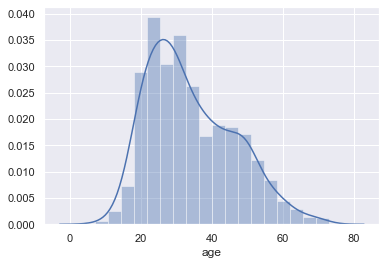

In [110]:
#your answers here
#user.info()
sns.distplot(user['age'])

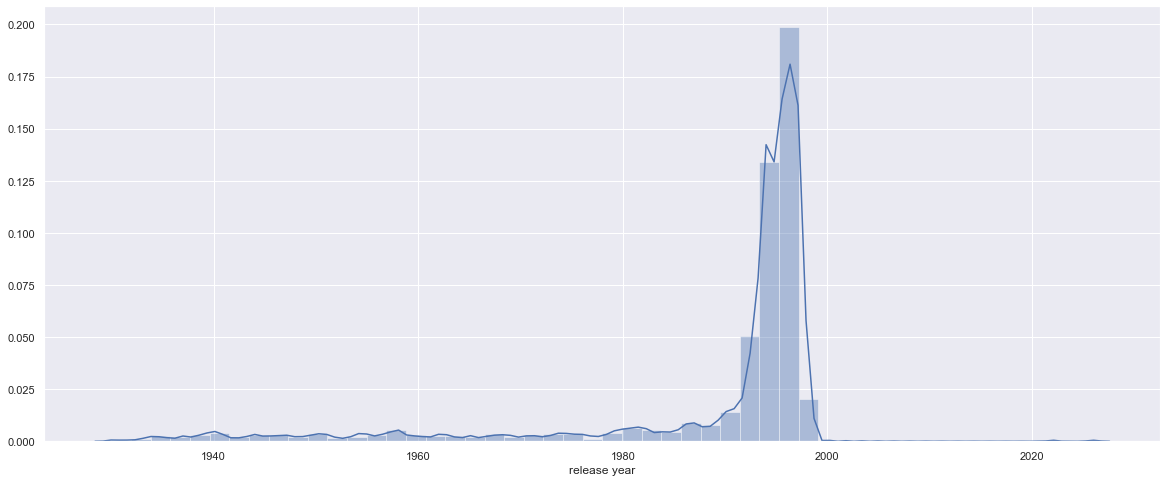

In [106]:
#item_by_year['release date']=pd.to_datetime(item_by_year['release date'])
#item['release year']=item['release date'].dt.year
fig, ax = plt.subplots(figsize=(20,8))
sns.distplot(item_by_year['release year'])

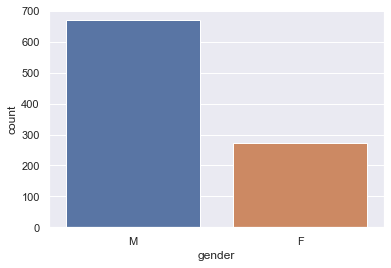

In [105]:
sns.countplot(user['gender']);

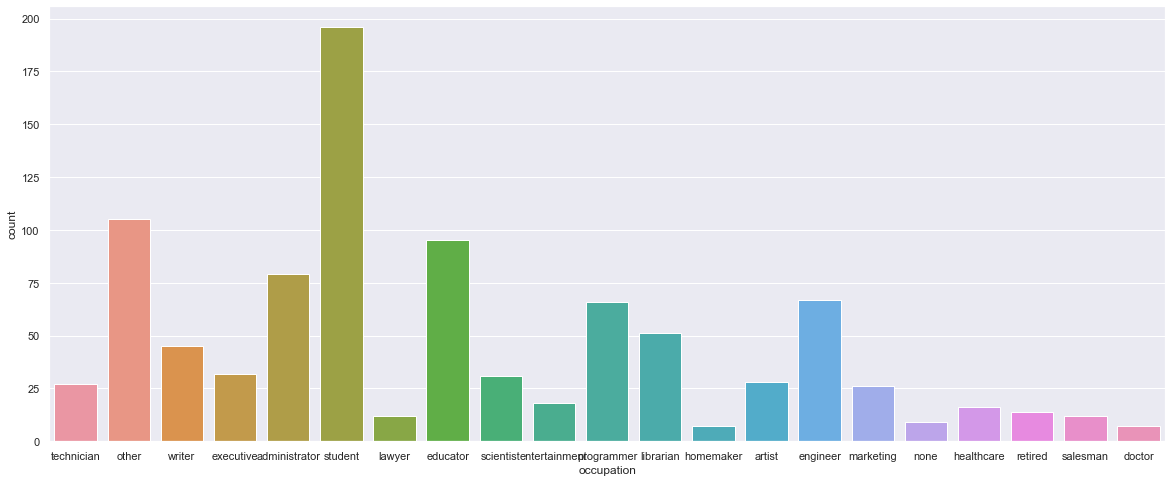

In [107]:
fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(user['occupation']);

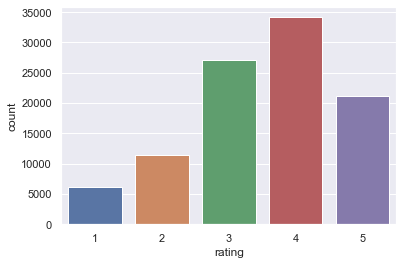

In [108]:
sns.countplot(data['rating']);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [436]:
#item

In [164]:
#Your answer here
genre = ['release year','Action','Adventure' ,'Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror', 
'Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
k3 = item_by_year[genre]
k4 = k3.groupby('release year').sum(axis =0 )
#k4.reset_index()
k4

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,
1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1933,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1934,0,0,0,0,2,0,0,1,0,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2
1997,46,20,3,22,87,30,6,113,4,2,8,5,18,51,13,54,14,0
1998,12,3,0,1,13,7,3,33,1,2,4,1,3,11,5,18,0,0


### 9. Find the top 25 movies, each having a minimum of 100 ratings - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [349]:
#your answer here
df1 =pd.merge(item,data,how='inner',on='movie id')
df2 = df1.groupby(["movie title"],as_index=False)["rating"].count()
df2_rating=df2[df2['rating'] >= 100 ]['movie title']
df2_rating
#df2_rating.sort_values(by = 'rating' , ascending = False).head(25)

2                              101 Dalmatians 
3                                12 Angry Men 
7                       2001: A Space Odyssey 
15                             Absolute Power 
16                                 Abyss, The 
                         ...                  
1628    Willy Wonka and the Chocolate Factory 
1639                        Wizard of Oz, The 
1647                      Wrong Trousers, The 
1652                       Young Frankenstein 
1653                               Young Guns 
Name: movie title, Length: 338, dtype: object

In [377]:
#Find Average
df1_avg = df1.groupby(["movie title"],as_index=False)["rating"].mean()
#Find the movies for which at least one them fall with minimum 100 ratings
df2 = df1_avg[df1_avg["movie title"].isin(df2_rating)]
df2
df2.sort_values(by = 'rating' , ascending = False).head(25)

,movie title,rating
317,"Close Shave, A",4.491071
1278,Schindler's List,4.466443
1647,"Wrong Trousers, The",4.466102
272,Casablanca,4.456790
1313,"Shawshank Redemption, The",4.445230
1214,Rear Window,4.387560
1567,"Usual Suspects, The",4.385768
1394,Star Wars,4.358491
3,12 Angry Men,4.344000
302,Citizen Kane,4.292929


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:

